In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from numpy import asarray

In [409]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [411]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [412]:
df.drop(['Transaction date','latitude', 'longitude'],axis = 1,inplace = True)

In [413]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


In [414]:
df['price'] = df['House size (sqft)']*df['House price of unit area']

In [415]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price
0,32.0,84.87882,10,1,575,37.9,21792.5
1,19.5,306.59470,9,2,1240,42.2,52328.0
2,13.3,561.98450,5,3,1060,47.3,50138.0
3,13.3,561.98450,5,2,875,54.8,47950.0
4,5.0,390.56840,5,1,491,43.1,21162.1
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4,12366.2
410,5.6,90.45606,9,2,1278,50.0,63900.0
411,18.8,390.96960,7,1,503,40.6,20421.8
412,8.1,104.81010,5,1,597,52.5,31342.5


In [416]:
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,1.987923,931.475845,37.980193,35597.804106
std,11.392485,1262.109595,2.945562,0.818875,348.910269,13.606488,19890.892075
min,0.000000,23.382840,0.000000,1.000000,402.000000,7.600000,5440.400000
25%,9.025000,289.324800,1.000000,1.000000,548.000000,27.700000,20482.700000
50%,16.100000,492.231300,4.000000,2.000000,975.000000,38.450000,31224.200000
75%,28.150000,1454.279000,6.000000,3.000000,1234.750000,46.600000,48439.375000
max,43.800000,6488.021000,10.000000,3.000000,1500.000000,117.500000,161327.500000


In [417]:
df.duplicated().sum()

0

In [418]:
df.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price
House Age,1.000000,0.025622,0.049593,-0.008756,-0.060361,-0.210567,-0.198741
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.046856,0.001795,-0.673613,-0.441094
Number of convenience stores,0.049593,-0.602519,1.000000,0.043638,0.033286,0.571005,0.381169
Number of bedrooms,-0.008756,-0.046856,0.043638,1.000000,0.752276,0.050265,0.548679
House size (sqft),-0.060361,0.001795,0.033286,0.752276,1.000000,0.046489,0.702782
House price of unit area,-0.210567,-0.673613,0.571005,0.050265,0.046489,1.000000,0.698585
price,-0.198741,-0.441094,0.381169,0.548679,0.702782,0.698585,1.000000


In [419]:
df['Number of bedrooms'].unique()

array([1, 2, 3], dtype=int64)

## Categorical Data

-- Number of Bedrooms

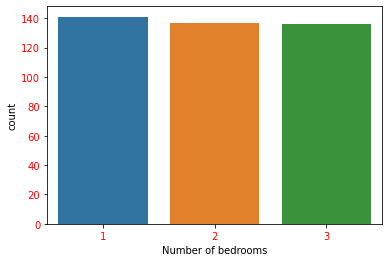

In [420]:
sns.countplot(df['Number of bedrooms'])
plt.xticks(color = 'r')
plt.yticks(color = 'r')

plt.show()

In [421]:
import warnings 
warnings.filterwarnings('ignore')

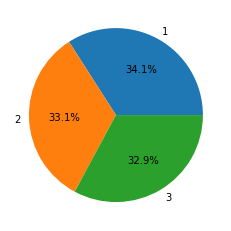

In [422]:
plt.pie(df['Number of bedrooms'].value_counts(),labels =[1,2,3],autopct = '%1.1f%%')

plt.show()

## Numerical Data

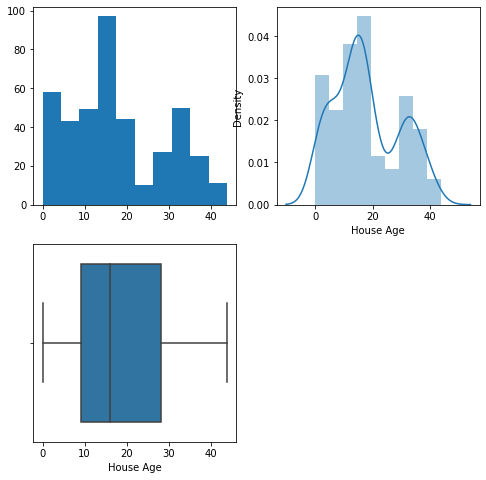

In [423]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.hist(df['House Age'])

plt.subplot(2,2,2)
sns.distplot(df['House Age'])

plt.subplot(2,2,3)
sns.boxplot(df['House Age'])
plt.show()

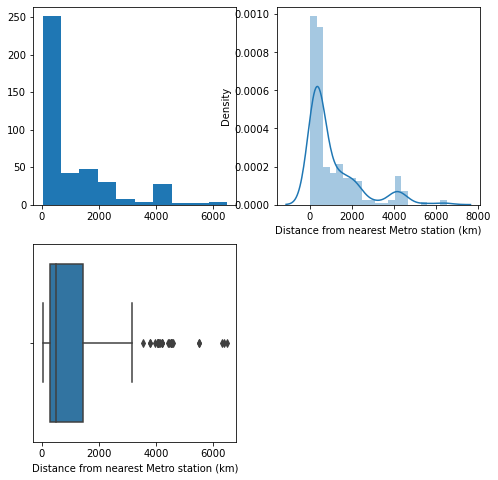

In [424]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.hist(df['Distance from nearest Metro station (km)'])

plt.subplot(2,2,2)
sns.distplot(df['Distance from nearest Metro station (km)'])

plt.subplot(2,2,3)
sns.boxplot(df['Distance from nearest Metro station (km)'])
plt.show()

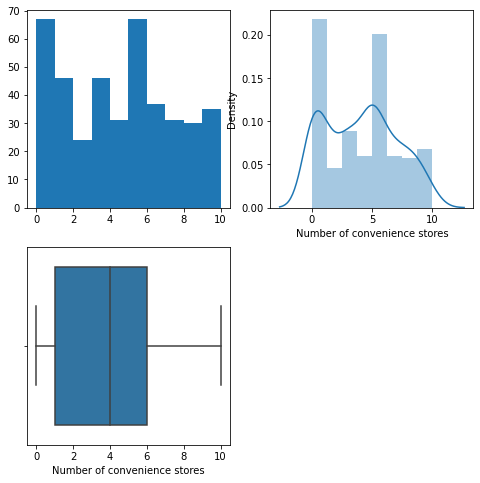

In [425]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.hist(df['Number of convenience stores'])

plt.subplot(2,2,2)
sns.distplot(df['Number of convenience stores'])

plt.subplot(2,2,3)
sns.boxplot(df['Number of convenience stores'])
plt.show()

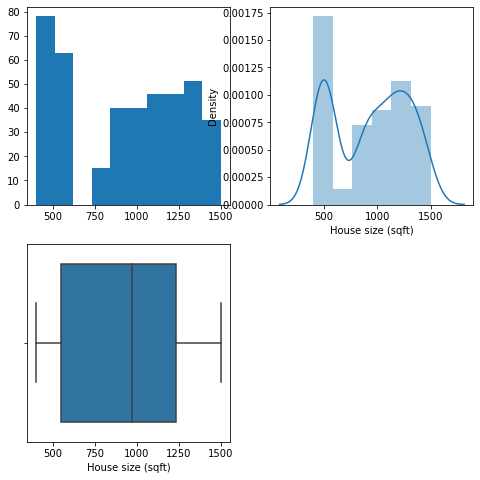

In [426]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.hist(df['House size (sqft)'])

plt.subplot(2,2,2)
sns.distplot(df['House size (sqft)'])

plt.subplot(2,2,3)
sns.boxplot(df['House size (sqft)'])
plt.show()

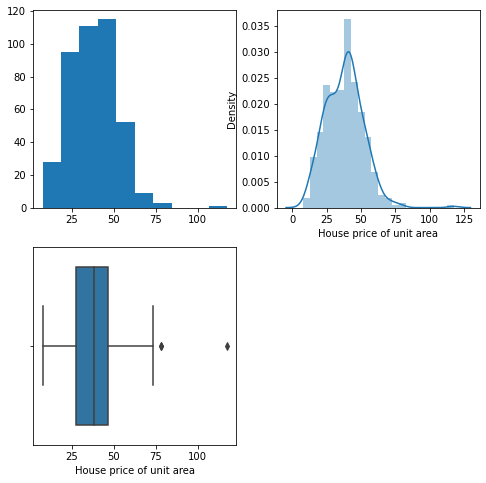

In [427]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.hist(df['House price of unit area'])

plt.subplot(2,2,2)
sns.distplot(df['House price of unit area'])

plt.subplot(2,2,3)
sns.boxplot(df['House price of unit area'])
plt.show()

## Removing the outliers

In [428]:
a = df['House price of unit area'].quantile(0.75)
b = df['House price of unit area'].quantile(0.25)

In [429]:
iqr = df['House price of unit area'].quantile(0.75)-df['House price of unit area'].quantile(0.25)

In [430]:
upper = a +1.5 *iqr
lower = b - 1.5 *iqr
print(lower,upper)

-0.6500000000000021 74.95


In [431]:
df[df['House price of unit area']>upper]

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price
220,37.2,186.5101,9,2,1187,78.3,92942.1
270,10.8,252.5822,1,2,1373,117.5,161327.5
312,35.4,318.5292,9,1,433,78.0,33774.0


In [432]:
df[df['House price of unit area']<lower]

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price


In [433]:
df1 = df[df['House price of unit area']<upper]

In [434]:
df.shape

(414, 7)

In [435]:
df1.shape

(411, 7)

## comparing before and after

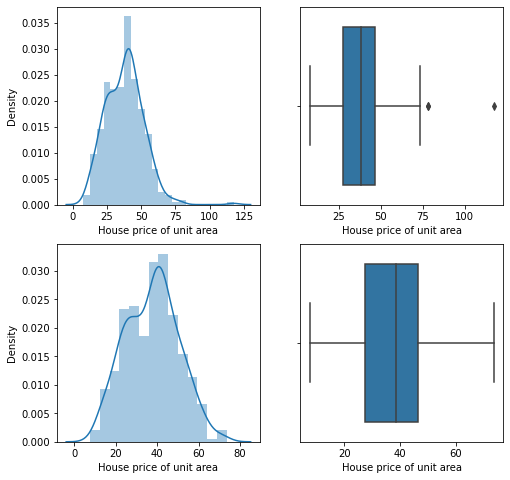

In [436]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df['House price of unit area'])

plt.subplot(2,2,2)
sns.boxplot(df['House price of unit area'])

plt.subplot(2,2,3)
sns.distplot(df1['House price of unit area'])

plt.subplot(2,2,4)
sns.boxplot(df1['House price of unit area'])



plt.show()

In [437]:
##distance from metro column outlier

In [438]:
a = df['Distance from nearest Metro station (km)'].quantile(0.75)
b = df['Distance from nearest Metro station (km)'].quantile(0.25)
iqr = df['Distance from nearest Metro station (km)'].quantile(0.75)-df['Distance from nearest Metro station (km)'].quantile(0.25)
upper = a +1.5 *iqr
lower = b - 1.5 *iqr
print(lower,upper)

-1458.1065000000003 3201.7103


In [439]:
df2 = df1[df1['Distance from nearest Metro station (km)']<3000]

In [440]:
df2.shape

(370, 7)

In [441]:
df2.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,17.428919,734.666256,4.505405,1.997297,926.600000,39.523243,36880.515135
std,11.724463,665.023048,2.774491,0.831294,348.116367,11.667909,18655.256232
min,0.000000,23.382840,0.000000,1.000000,402.000000,7.600000,8629.600000
25%,8.000000,279.172600,2.000000,1.000000,548.000000,30.625000,21705.600000
50%,15.600000,461.443200,5.000000,2.000000,970.000000,39.850000,33297.950000
75%,28.550000,1122.093750,7.000000,3.000000,1234.750000,47.250000,50237.000000
max,43.800000,2707.392000,10.000000,3.000000,1498.000000,73.600000,106572.800000


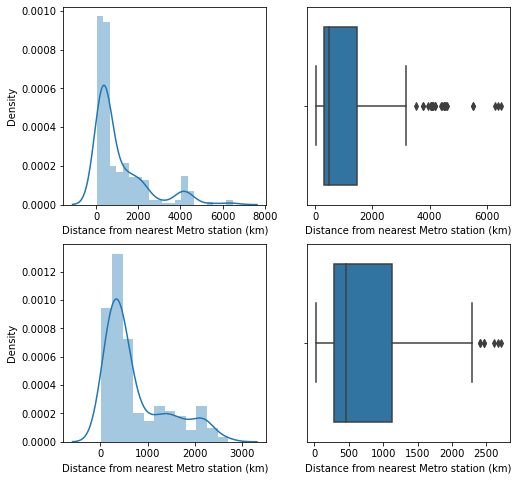

In [442]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df1['Distance from nearest Metro station (km)'])

plt.subplot(2,2,2)
sns.boxplot(df1['Distance from nearest Metro station (km)'])

plt.subplot(2,2,3)
sns.distplot(df2['Distance from nearest Metro station (km)'])

plt.subplot(2,2,4)
sns.boxplot(df2['Distance from nearest Metro station (km)'])



plt.show()

In [443]:
a = df2['price'].quantile(0.75)
b = df2['price'].quantile(0.25)
iqr = df2['price'].quantile(0.75)-df2['price'].quantile(0.25)
upper = a +1.5 *iqr
lower = b - 1.5 *iqr
print(lower,upper)

-21091.500000000007 93034.1


In [444]:
df3 = df2[df2['price']<upper]

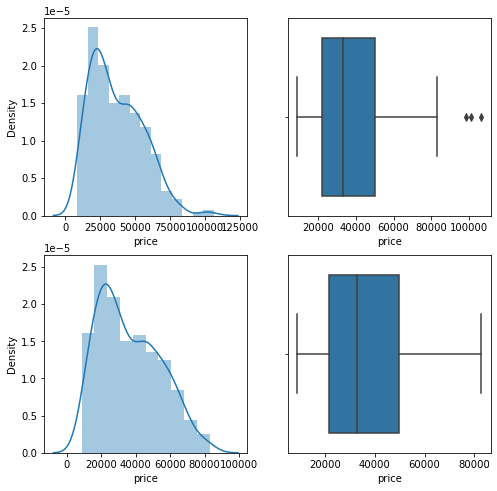

In [445]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df2['price'])

plt.subplot(2,2,2)
sns.boxplot(df2['price'])

plt.subplot(2,2,3)
sns.distplot(df3['price'])

plt.subplot(2,2,4)
sns.boxplot(df3['price'])



plt.show()

In [446]:
x = df3.drop(['price'],axis = 1)
y = df3['price']

In [447]:
## splitting the data into training and testing data.

In [448]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [449]:
print(x.shape,x_train.shape,x_test.shape)

(367, 6) (293, 6) (74, 6)


## Model Training

-- XGBoost Regressor

In [450]:
#  loading the model

model = XGBRegressor()

In [451]:
# training the model with x_train

model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [452]:
# accuracy for prediction on training data 
training_data_prediction = model.predict(x_train)
    

In [453]:
# R squared error

score_1 = metrics.r2_score(y_train,training_data_prediction)

# mean absolute error

score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

print(score_1,score_2)

0.9999993423338808 10.324512718643323


In [454]:
# Applying on test data

y_testp = model.predict(x_test)

In [455]:
# R squared error

s1 = metrics.r2_score(y_test,y_testp)

# mean absolute error

s2 = metrics.mean_absolute_error(y_test,y_testp)

print(s1,s2)


0.9894238610454715 1189.1723923141897


In [456]:
loss = 1 - s1
print(loss)

0.010576138954528469


In [457]:
## model 2 using linear regression



In [458]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [459]:
df3

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area,price
0,32.0,84.87882,10,1,575,37.9,21792.5
1,19.5,306.59470,9,2,1240,42.2,52328.0
2,13.3,561.98450,5,3,1060,47.3,50138.0
3,13.3,561.98450,5,2,875,54.8,47950.0
4,5.0,390.56840,5,1,491,43.1,21162.1
...,...,...,...,...,...,...,...
408,18.5,2175.74400,3,1,477,28.1,13403.7
410,5.6,90.45606,9,2,1278,50.0,63900.0
411,18.8,390.96960,7,1,503,40.6,20421.8
412,8.1,104.81010,5,1,597,52.5,31342.5


## MODEL TRAINING
     ----LINEAR REGRESSION

In [460]:
scaler = StandardScaler()
lr = LinearRegression()

In [461]:
# Training the model

model2  = lr.fit(x_train,y_train)

In [462]:
print("My Linear regression model is ",lr.coef_,"x ",lr.intercept_)

My Linear regression model is  [-3.56009595e+01 -5.44595997e-01 -4.09330652e-01  2.49549010e+02
  3.93799610e+01  8.65737106e+02] x  -33337.65175919486


In [463]:
# applying on the test data

y_testp2 = lr.predict(x_test)

In [464]:
# r2 score

s3 = r2_score(y_test,y_testp2)

# mean absolute errror

s4 = metrics.mean_absolute_error(y_test,y_testp2) 

print(s3,s4)

0.9514258652019995 2559.5849577594217


In [465]:
loss = 1 - s3
print(loss)

0.048574134798000546


In [466]:


# predicting the real time value
# 'House Age' = 20, 'Distance from nearest Metro station (km)' = 500,
#       'Number of convenience stores' = 7, 'Number of bedrooms' = 3,
#       'House size (sqft)' = 1100, 'House price of unit area' = 38
r = [20,500,7,3,1100,38]
new_data = asarray([r])
print(model2.predict(new_data))


[42639.77993168]
